# Point Pattern Analysis
**For Household Income Census Tracts in LA County**

Author: Ashley Yao

Ran point pattern analysis to see household income variation in LA County.

## Import Libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Import Household Income Data

In [2]:
gdf = gpd.read_file('LA_HHinc.geojson')

## Cleaning Data

Removed extraneous columns and made even income brackets. 

In [3]:
columns_to_keep = ['geoid','name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']
gdf = gdf[columns_to_keep]

In [4]:
gdf.columns = ['geoid',
 'name','LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [5]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   geoid                 2347 non-null   object  
 1   name                  2347 non-null   object  
 2   LA County, CA         2347 non-null   float64 
 3   Less than $10,000     2347 non-null   float64 
 4   $10,000 to $14,999    2347 non-null   float64 
 5   $15,000 to $19,999    2347 non-null   float64 
 6   $20,000 to $24,999    2347 non-null   float64 
 7   $25,000 to $29,999    2347 non-null   float64 
 8   $30,000 to $34,999    2347 non-null   float64 
 9   $35,000 to $39,999    2347 non-null   float64 
 10  $40,000 to $44,999    2347 non-null   float64 
 11  $45,000 to $49,999    2347 non-null   float64 
 12  $50,000 to $59,999    2347 non-null   float64 
 13  $60,000 to $74,999    2347 non-null   float64 
 14  $75,000 to $99,999    2347 non-null   float64 
 

In [6]:
# I tried to make it as even as possible in brackets of approx. $50k
# But I couldn't figure out how to add my columns as float types

# gdf['mid50'] = gdf['$50,000 to $59,999'+'$60,000 to $74,999'+'$75,000 to $99,999']

## Webmercatoring Data and Sample Plot

In [7]:
gdf=gdf.to_crs('EPSG:3857')

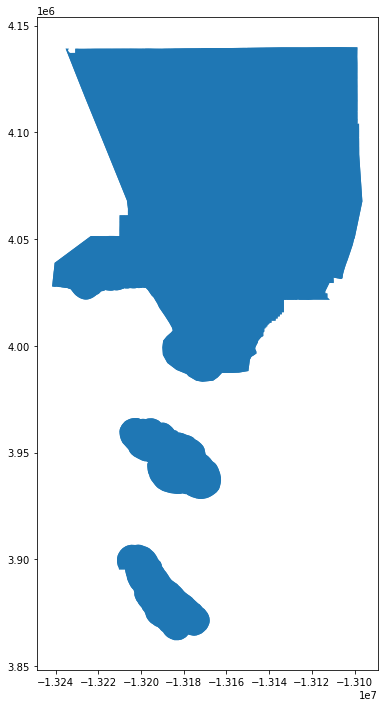

In [8]:
gdf.plot(figsize=(12,12),
         markersize=0.5)

## Creating Heat Maps SetUp

In [9]:
#code obtained from Katrina
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = gdf['geometry'].centroid
centroidseries 

0       POINT (-13164714.030 4055951.559)
1       POINT (-13168315.068 4063696.445)
2       POINT (-13167998.981 4064807.468)
3       POINT (-13168063.937 4062820.838)
4       POINT (-13167051.133 4062637.132)
                      ...                
2342    POINT (-13164957.131 3993358.776)
2343    POINT (-13159829.938 3994890.428)
2344    POINT (-13223886.210 4028690.691)
2345    POINT (-13190581.582 4017231.468)
2346    POINT (-13169784.743 3989407.805)
Length: 2347, dtype: geometry

In [10]:
gdf['geometry points'] = centroidseries

In [11]:
gdf.columns = ['geoid',
 'name','LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry','geometry points']

In [12]:
columns_to_keep2 = ['geoid',
 'name','LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry points']
gdf = gdf[columns_to_keep2]

In [13]:
gdf.columns = ['geoid',
 'name','LA County, CA',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

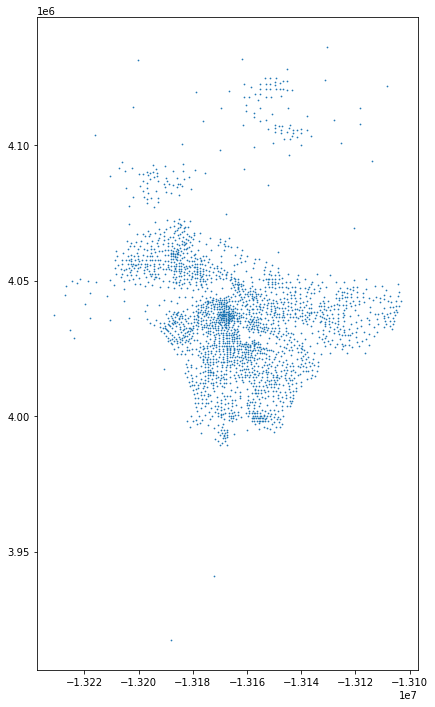

In [14]:
gdf = gpd.GeoDataFrame(gdf)
gdf.plot(figsize = (12,12),
        markersize = 0.5)

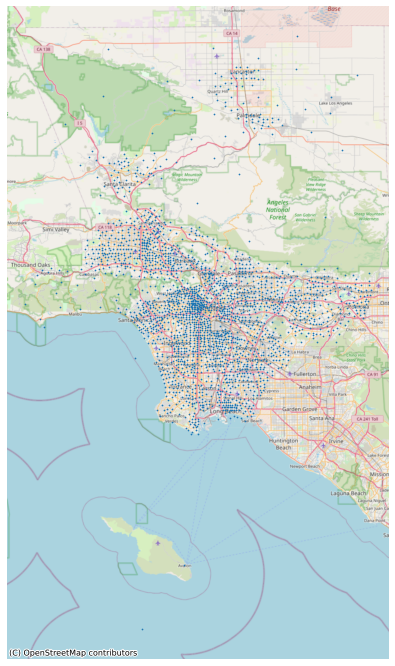

In [15]:
ax = gdf.plot(figsize=(12,12), markersize=0.5)
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik)

## Slicing Data

Create column to display majority of household income level

In [16]:
lvls = {'Less than $10,000':'<10K',
 '$10,000 to $14,999':'10K to 15K',
 '$15,000 to $19,999': '15K to 20K',
 '$20,000 to $24,999': '20K to 25K',
 '$25,000 to $29,999': '25K to 30K',
 '$30,000 to $34,999': '30K to 35K',
 '$35,000 to $39,999': '35K to 40K',
 '$40,000 to $44,999': '40K to 45K',
 '$45,000 to $49,999': '45K to 50K',
 '$50,000 to $59,999': '50K to 60K',
 '$60,000 to $74,999': '60K to 75K',
 '$75,000 to $99,999': '75K to 100K',
 '$100,000 to $124,999': '100K to 125K',
 '$125,000 to $149,999': '125K to 150K',
 '$150,000 to $199,999': '150K to 200K',
 '$200,000 or more': '>200K'}

In [17]:
gdf['majority'] = gdf[['Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more']].idxmax(axis=1).map(lvls)

In [18]:
gdf.majority.value_counts()

75K to 100K     732
>200K           475
60K to 75K      293
100K to 125K    193
<10K            133
50K to 60K      115
10K to 15K      112
150K to 200K    107
15K to 20K       42
125K to 150K     35
20K to 25K       30
30K to 35K       21
25K to 30K       21
40K to 45K       19
35K to 40K       12
45K to 50K        7
Name: majority, dtype: int64

I dicovered that a majority of people make over minimum wage however, there is a significant portion of people who live below the poverty line.

# Mapping

Received help handling Census Tract data from Katrina

In [19]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## Highest Income

,geoid,name,"LA County, CA","Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999",...,"$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,majority
2092,14000US06037670326,"Census Tract 6703.26, Los Angeles, CA",1338.0,66.0,9.0,19.0,9.0,46.0,11.0,0.0,...,0.0,67.0,48.0,104.0,95.0,149.0,117.0,582.0,POINT (-13180555.447 4000245.082),>200K


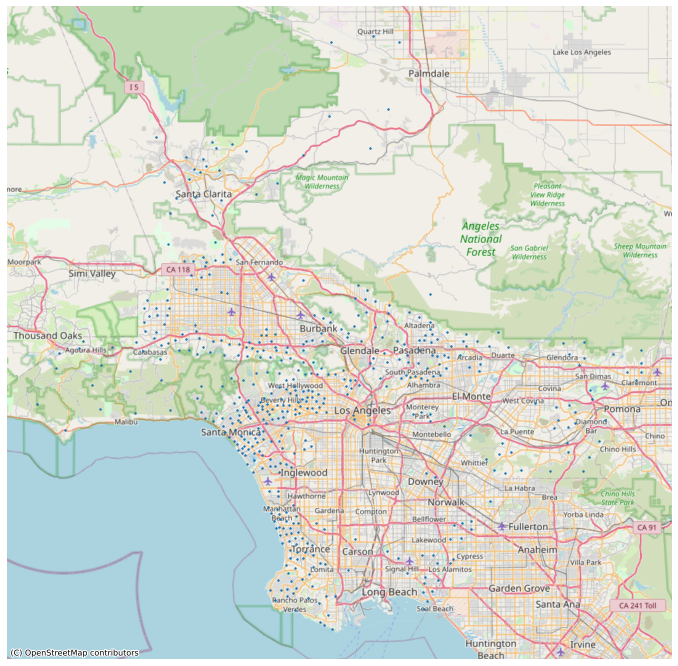

In [20]:
display(gdf[gdf.majority == '>200K'].sample()) 
ax = gdf[gdf.majority == '>200K'].plot(figsize=(12,12), markersize=2)
ax.axis('off')
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.OpenStreetMap.Mapnik)

## Lowest Income

,geoid,name,"LA County, CA","Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999",...,"$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,majority
698,14000US06037224410,"Census Tract 2244.10, Los Angeles, CA",1090.0,210.0,180.0,41.0,36.0,139.0,61.0,19.0,...,21.0,94.0,80.0,134.0,9.0,11.0,21.0,9.0,POINT (-13166867.079 4033521.044),<10K


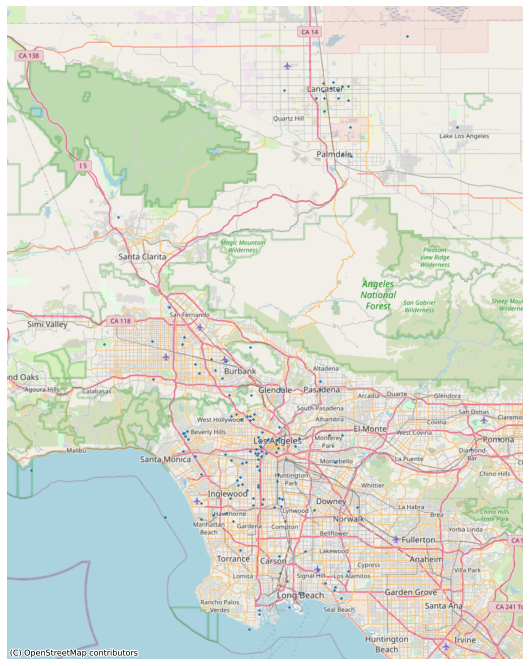

In [21]:
display(gdf[gdf.majority == '<10K'].sample()) 
ax = gdf[gdf.majority == '<10K'].plot(figsize=(12,12), markersize=2)
ax.axis('off')
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.OpenStreetMap.Mapnik)

## Majority Count

,geoid,name,"LA County, CA","Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999",...,"$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,majority
902,14000US06037272202,"Census Tract 2722.02, Los Angeles, CA",1588.0,18.0,78.0,66.0,70.0,48.0,123.0,50.0,...,67.0,122.0,195.0,231.0,192.0,44.0,98.0,107.0,POINT (-13184585.735 4028473.497),75K to 100K


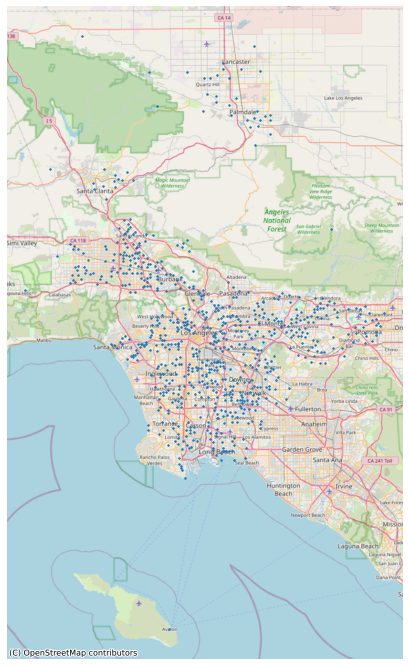

In [22]:
display(gdf[gdf.majority == '75K to 100K'].sample()) 
ax = gdf[gdf.majority == '75K to 100K'].plot(figsize=(12,12), markersize=2)
ax.axis('off')
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.OpenStreetMap.Mapnik)

## Interactive Map

because we don't want to do this for every level...

In [23]:
def inc_by(gdf='<10K'):
    display(gdf[gdf.majority == majority].head())
    ax = gdf[gdf.majority == majority].plot(figsize=(12,12), markersize=2)
    ax.axis('off')
    ctx.add_basemap(ax,
                    source=ctx.providers.OpenStreetMap.Mapnik)

In [24]:
toggle = gdf.majority.unique().tolist()

In [25]:
@interact
def inc_by(majority = toggle):
    display(gdf[gdf.majority == majority].sample()) 
    ax = gdf[gdf.majority == majority].plot(figsize=(12,12), markersize=2)
    ax.axis('off')
    ctx.add_basemap(ax,
                    source=ctx.providers.OpenStreetMap.Mapnik)

interactive(children=(Dropdown(description='majority', options=('75K to 100K', '15K to 20K', '10K to 15K', '15…

# Seaborn Plots

In [26]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

## Scatterplot

Created interactive map with different Seabork color palette selections

In [27]:
@interact
def sns_styles(style=['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']):
    sns.set_style(style)
    sns.relplot(data=gdf,
                x='x', 
                y='y',
                s=3)

interactive(children=(Dropdown(description='style', options=('darkgrid', 'whitegrid', 'dark', 'white', 'ticks'…

## Joint Plots

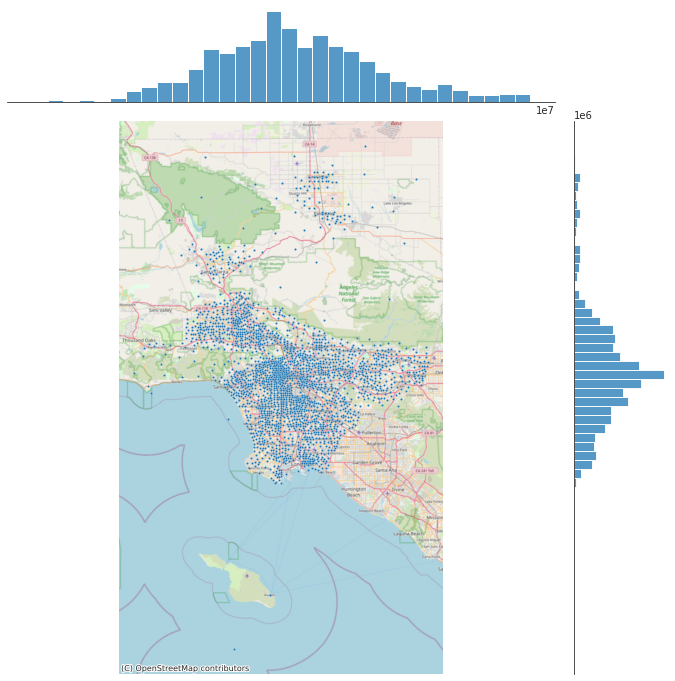

In [28]:
sns.set_style('white')
g = sns.jointplot(data = gdf,
                  x='x', 
                  y='y',
                  s=5,
                  height=10)
g.ax_joint.set_axis_off()
ctx.add_basemap(g.ax_joint,source=ctx.providers.OpenStreetMap.Mapnik) 

**KDE PLOT**

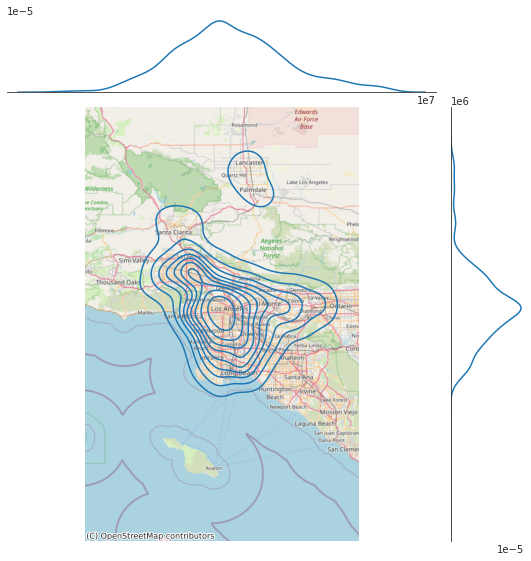

In [29]:
g = sns.jointplot(data = gdf,
              x='x', 
              y='y', 
              kind='kde',
              height=8)
ctx.add_basemap(g.ax_joint,
                source=ctx.providers.OpenStreetMap.Mapnik)
g.ax_joint.set_axis_off()

In [ ]:
#'<10K',
#'10K to 15K',
#'15K to 20K',
#'20K to 25K',
#'25K to 30K',
#'30K to 35K',
#'35K to 40K',
#'40K to 45K',
#'45K to 50K',
#'50K to 60K',
#'60K to 75K',
#'75K to 100K',
#'100K to 125K',
#'125K to 150K',
#'150K to 200K',
#'>200K'

# okay this isn't working, so moving on for now.
# restarted and cleared all output

In [ ]:
gdf_lowest = gdf[gdf.majority.isin(['<10K'])]
gdf_highest =gdf[gdf.majority.isin(['>200K'])]
gdf_25 = gdf[gdf.majority.isin(['10K to 15K',
'15K to 20K',
'20K to 25K',
'25K to 30K',
'30K to 35K',
'35K to 40K',
'40K to 45K',
'45K to 50K'])]
gdf_50 = gdf[gdf.majority.isin(['50K to 60K',
'60K to 75K',
'75K to 100K'])]
gdf_75 = gdf[gdf.majority.isin(['100K to 125K','125K to 150K'])]
gdf_100 = gdf[gdf.majority.isin(['150K to 200K'])]

In [ ]:
g = sns.jointplot(data = gdf_lowest,
              x='x', 
              y='y', 
              kind='kde',
              height=8)
ctx.add_basemap(g.ax_joint,
                source=ctx.providers.OpenStreetMap.Mapnik)
g.ax_joint.set_axis_off()

In [ ]:
toggle2 = ['gdf_lowest','gdf_highest','gdf_25','gdf_50','gdf_75','gdf_100']

In [ ]:
@interact
def sns(data = toggle2):
    g = sns.jointplot(data = gdf_lowest,
              x='x', 
              y='y', 
              kind='kde',
              height=8)
    ctx.add_basemap(g.ax_joint,
                source=ctx.providers.OpenStreetMap.Mapnik)
    g.ax_joint.set_axis_off()

# Centrography

## Central Tendency

In [30]:
mean_center = centrography.mean_center(gdf[['x','y']])
med_center = centrography.euclidean_median(gdf[['x','y']])

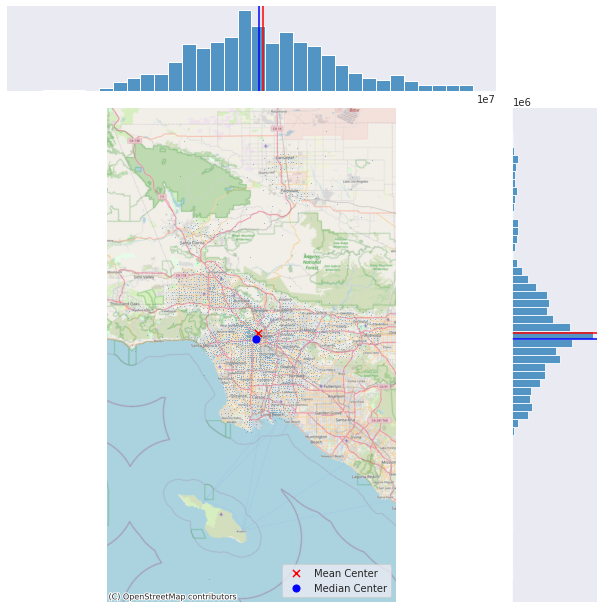

In [42]:
g = sns.jointplot(
    x='x', y='y', data=gdf, s=0.75, height=9)

g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center')
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')


g.ax_joint.scatter(
    *med_center, color='b', marker='o', s=50, label='Median Center')
g.ax_marg_x.axvline(med_center[0], color='b')
g.ax_marg_y.axhline(med_center[1], color='b')


g.ax_joint.legend()
ctx.add_basemap(
    g.ax_joint,
    source=ctx.providers.OpenStreetMap.Mapnik)
g.ax_joint.set_axis_off()
plt.show()


## Dispersion and Orientation

In [32]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

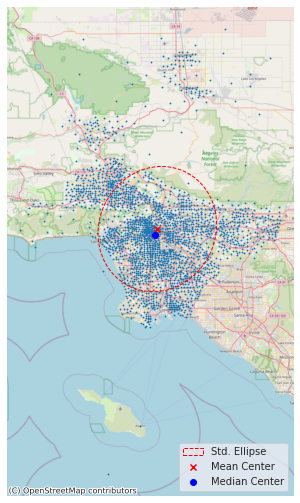

In [41]:
sns.set_style('dark')
f, ax = plt.subplots(1, figsize=(9, 9))

ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='b', marker='o', label='Median Center')

ellipse = Ellipse(xy=mean_center, 
                  width=major*2, 
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation),
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)
ax.legend()
ax.axis('off')
ctx.add_basemap(ax,
                crs='epsg:3857',
                source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

In [35]:
# I need to play around more with slicing and combining the data to produce meaningful analysis